<a href="https://colab.research.google.com/github/wingated/cs180_labs/blob/main/chloropleth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# run wget to download data
!wget http://liftothers.org/byu/worldcities.csv

--2021-02-01 17:14:49--  http://liftothers.org/byu/worldcities.csv
Resolving liftothers.org (liftothers.org)... 50.62.229.1
Connecting to liftothers.org (liftothers.org)|50.62.229.1|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2859311 (2.7M) [text/csv]
Saving to: ‘worldcities.csv’

worldcities.csv     100%[===================>]   2.73M  1.58MB/s    in 1.7s    

2021-02-01 17:14:51 (1.58 MB/s) - ‘worldcities.csv’ saved [2859311/2859311]



In [2]:
%matplotlib inline

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.rcParams['figure.figsize'] = [12, 8]

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

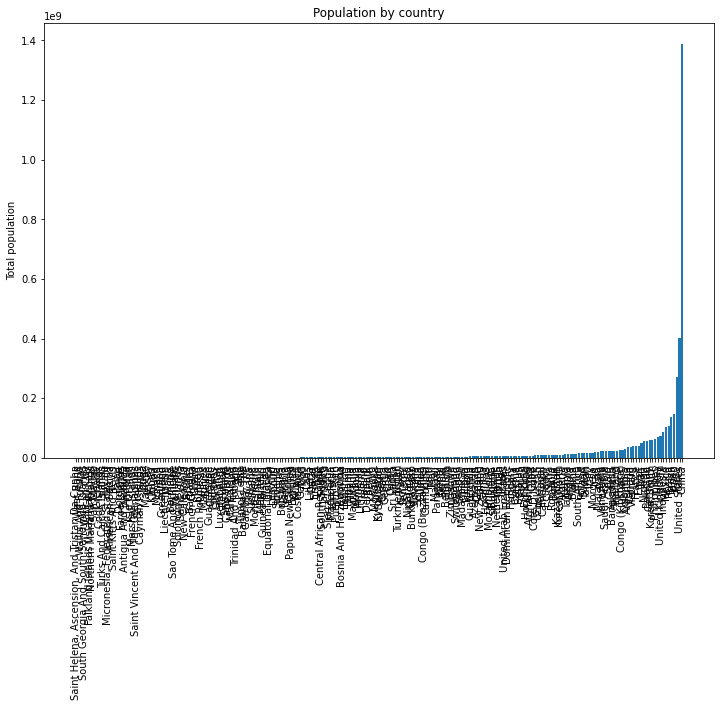

In [28]:
df = pd.read_csv( "./worldcities.csv")
gb = df.groupby('country')

sums = gb.sum()
means = gb.mean()

pops = sums['population']
spops = pops.sort_values()

plt.bar( range(224), spops, tick_label=spops.index ) 
plt.title('Population by country')
plt.ylabel('Total population')
plt.xticks(rotation = 90)


In [29]:
# Try to generate a chloropleth

In [30]:
! pip install descartes geopandas

     |████████████████████████████████| 972kB 11.1MB/s 
     |████████████████████████████████| 6.5MB 23.1MB/s 
     |████████████████████████████████| 14.8MB 318kB/s 


In [35]:
import geopandas

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est>0) & (world.name!="Antarctica")]


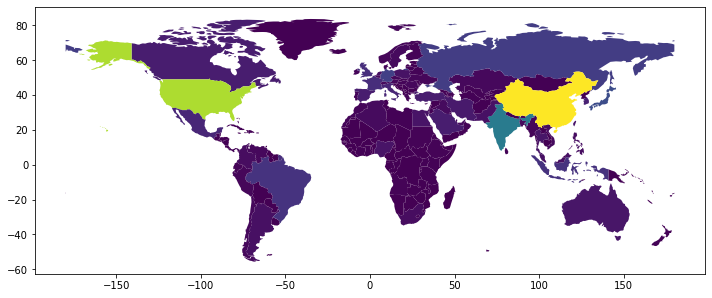

In [40]:
world.plot( column='gdp_md_est' )

In [41]:
world['newpop'] = 0

In [45]:
for index, row in world.iterrows():
    #print( index, row )
    cname = row['name']
    if cname in pops:
        row['newpop'] = pops[ cname ]
        world.iloc[index] = row


In [46]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,newpop
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",286476.0
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",11276325.0
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0.0
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",37747786.0
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",0.0
...,...,...,...,...,...,...,...
172,2103721,Europe,Macedonia,MKD,29520.0,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",1498142.0
173,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",3628632.0
174,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",319993.0
175,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",1964079.0


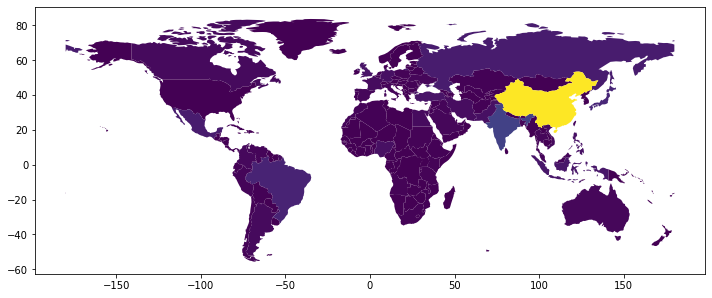

In [47]:
world.plot(column='newpop')